<a href="https://colab.research.google.com/github/nikhilgang/DEEP-LEARNING_implementation/blob/master/Fashion_MNIST_using_cnn_UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)



4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


y = 0 T-shirt/top


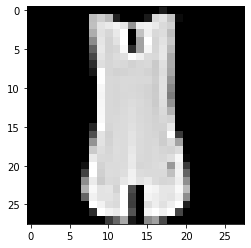

In [2]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Print the label of the fifth image from the training dataset
label_index = y_train[4]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Show the fifth image from the training dataset
plt.imshow(x_train[4], cmap='gray')

In [0]:
# Reshape the dimensions
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split training data into train / validation sets (5000 validation / keep remaining 55,000 for training)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

# Define the model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


Using TensorFlow backend.


In [5]:
# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [6]:
from keras.callbacks import ModelCheckpoint

# Training of the model
# here check pointer is use to take the best trained weights and if our training is interrupt , our lots of work still save.
checkpointer = ModelCheckpoint(filepath='model_best_weights.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])




Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 210us/step - loss: 0.6141 - accuracy: 0.7721 - val_loss: 0.3934 - val_accuracy: 0.8602

Epoch 00001: val_loss improved from inf to 0.39342, saving model to model_best_weights.hdf5
Epoch 2/10
55000/55000 [==============================] - 5s 83us/step - loss: 0.4208 - accuracy: 0.8471 - val_loss: 0.3274 - val_accuracy: 0.8846

Epoch 00002: val_loss improved from 0.39342 to 0.32741, saving model to model_best_weights.hdf5
Epoch 3/10
55000/55000 [==============================] - 5s 84us/step - loss: 0.3733 - accuracy: 0.8644 - val_loss: 0.2964 - val_accuracy: 0.8976

Epoch 00003: val_loss improved from 0.32741 to 0.29636, saving model to model_best_weights.hdf5
Epoch 4/10
55000/55000 [==============================] - 4s 82us/step - loss: 0.3463 - accuracy: 0.8744 - val_loss: 0.2731 - val_accuracy: 0.9014

Epoch 00004: val_loss improved from 0.29636 to 0.27306, saving model to m

Text(0.5, 0, '# of epochs')

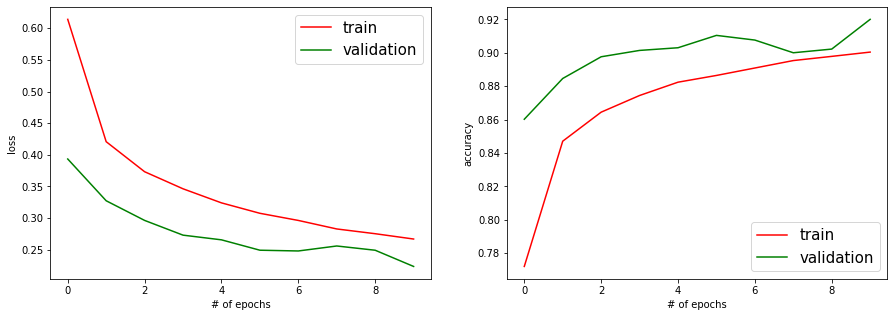

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'g-', label='validation')
plt.legend(prop={'size': 15})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_accuracy'], 'g-', label='validation')
plt.legend(prop={'size': 15})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

In [12]:
# Load the weights with the best validation accuracy
model.load_weights('model_best_weights.hdf5')

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=1)

# Print test loss
print('\n', 'Test loss:', score[0])

# Print test accuracy
print('\n', 'Test accuracy:', score[1])



10000/10000 [==============================] - 1s 74us/step

 Test loss: 0.24749145122766494

 Test accuracy: 0.9089999794960022


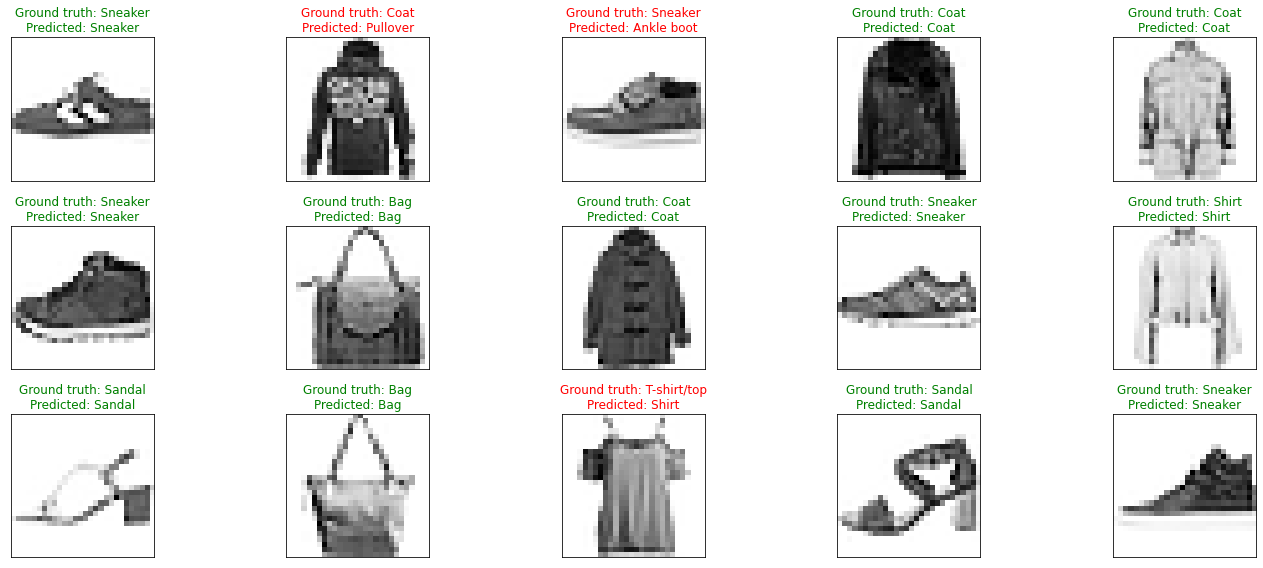

In [14]:
# Visualise 15 random test images along with their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap='Greys')
    predict_index = y_pred[index]
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("Ground truth: {}\nPredicted: {}".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.tight_layout()